In [3]:
import spectral.io.envi as envi
from spectral import *  

Avodata_recorded = []

hdr = "/mnt/d/day1/fruit1/avo_s1_f1_back_2024-03-11_15-07-02.hdr"
binary = "/mnt/d/day1/fruit1/avo_s1_f1_back_2024-03-11_15-07-02.raw"
image = envi.open (hdr, binary).load()
Avodata_recorded.append(image)

preAvodata_recorded = []
hdr = "/home/sayan/ce301/avocado/day_2/avocado_day_02_01_back.hdr"
binary = "/home/sayan/ce301/avocado/day_2/avocado_day_02_01_back.bin"
image = envi.open (hdr, binary).load()
preAvodata_recorded.append(image)

/home/sayan/test/env/lib/python3.10/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from PIL import *
import cv2

def draw_graph(name ,avodata):
    plt.figure()
    plt.xlabel("wavwlength (nm)")
    plt.ylabel("Reflectance")

    single_band_data = avodata[0][:, :, 223]
    im = np.asarray(single_band_data* 255 , dtype='uint8')
    # extracting image data for kmeans algorithm
    # default values as Parameters for corner detection
    blockSize = 2 
    ksize = 3      
    k = 0.04  
    
    # finding corners from corner harris
    corners = cv2.cornerHarris(single_band_data, blockSize, ksize, k)
    # Find bounding box around the corners
    non_zero = np.where(corners > 0.01 * corners.max())
    x, y, w, h = np.min(non_zero[1]), np.min(non_zero[0]), np.max(non_zero[1]) - np.min(non_zero[1]), np.max(non_zero[0]) - np.min(non_zero[0])
    
    avo_reg= single_band_data[y:y+h, x:x+w]
    mean_intensity = np.mean(avo_reg)
    
    threshold_val  = int (mean_intensity)
    ret, mask = cv2.threshold(single_band_data, threshold_val, 255, cv2.THRESH_BINARY)
    cv2.bitwise_and 
    
    current_data = avodata[0]
    Meval = 0
    Meanval = []
# Sample data for demonstration
    for i in range(0, 224):
        img = current_data.read_band(i)
        
        masked_image = img.copy()
        masked_image[mask == 0] = 0
        me = np.mean(masked_image[mask> 0])
        Meval += me
        Meanval.append(me)
        
    
    rmean  = Meval/224
    print(str(name )+" mean: " + str (rmean))
    Meanval = np.array(Meanval) 
    plt.plot(range(0,224), Meanval, color='green', label='mean Pixel Value')
    plt.title(str(name))
    plt.grid()
    



Avocado recorded in research lab mean: 397.27605383736744


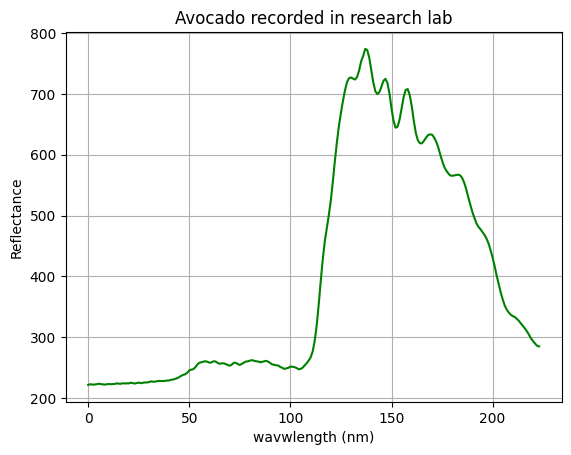

In [4]:
draw_graph("Avocado recorded in research lab",Avodata_recorded)

pre recorded avocados mean: 0.25517726194811985


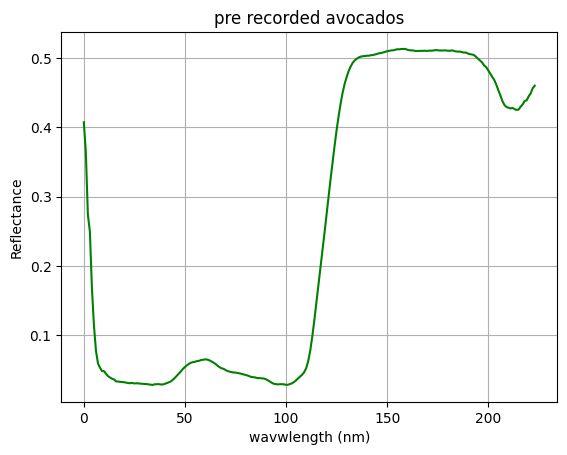

In [5]:
draw_graph("pre recorded avocados",preAvodata_recorded)